## 6 семестр. Прикладная электродинамика.

### Расчёт поля диполя + визуализация

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def static_E(r: np.array, d: np.array) -> np.array:
  """
    Расчёт поля в точке с радиус-вектором r от **покоящегося** диполя с дип. моментом d

    Parameters:
        r (np.array): .
        d (np.array): 

    Returns:
       E (np.array): поле
  """

  return None

In [265]:
from numba import jit

@jit
def G(k , R):
  """
  Функция Грина

  Параметры:
    k: волновое число
    R: модуль радиус-вектора
  """
  return np.exp( -1j * k * R ) / R

def f(r, r_s, E, k, n_s):
  """
  Подынтегральная фукнция интеграла Кирхгофа

  Параметры:
    r: радиус-вектор точки, где надо посчитать поле
    r_s: r', немой вектор интегрирования по сфере
    E: поле в точках сферы
    k: волновое число
    n_s: n', нормаль к площадке на сфере 
  """
  R = np.linalg.norm(r - r_s)
  assert np.linalg.norm(r) != np.linalg.norm(r_s), "f(): same len vectors supplied"

  dGdn = (1j * k - 1/R) * G(k, R) * (np.dot(r - r_s, n_s)) / R

  h = 1e-6
  dEdn = (E(r_s + h) - E(r_s - h)) / (2*h)

  return dGdn * E(r_s) #- G(k, R) * dEdn

def calculate_E(r, E, k, N=100, M=100):
  """
  Расчёт поля в точке r ч/з вычисление интеграла Кирхгофа

  Параметры:
    r - радиус-вектор точки, где надо посчитать поле
    E - поле, на основе которого посчитается новое
    k - волновое число
    N, M - дискретизация угла 
  """
  theta = np.linspace(0, np.pi, N)
  phi = np.linspace(0, 2*np.pi, M)
  dtheta = theta[1] - theta[0]
  dphi = phi[1] - phi[0]

  integral = 0.0
  for t in theta:
    for p in phi:
       
      R = 0.9
      # Переход в декартовы координаты на сфере
      x = R * np.sin(t) * np.cos(p)
      y = R * np.sin(t) * np.sin(p)
      z = R * np.cos(t)
      # Значение функции в точке
      n_s = np.array([x,y,z])/np.linalg.norm(np.array([x,y,z]))
      r_s = np.array([x,y,z])

      value = 1 * f(r, r_s, E, k, n_s) / 4 / np.pi

      integral += R**2 * value * np.sin(t) * dtheta * dphi

  # print(integral)
  return integral

def E0(r, t=0):
  r = np.asarray(r)
  d0 = np.array([0,1,0])
  w  = 2 * np.pi * 10
  d = d0 * np.exp(-1j * w * t)
  E = (3 * r * np.dot(r, d) - np.linalg.norm((r))**2 * d) / np.linalg.norm(r)**5

  return E

In [ ]:
E0([0,1,0])

array([0.+0.j, 2.+0.j, 0.+0.j])

In [271]:
eps = 1
mu  = 1
k_orig = 2 * np.pi / 0.5 # ???
k = eps * mu * k_orig
k = 0

#N=1
#M=20
# theta = np.linspace(0, np.pi, N)
phi = np.linspace(0, 2*np.pi, 100)
theta = [np.pi / 2]
#phi = [0, np.pi/2]

M = len(phi)
N = len(theta)
Es = [[[0] for _ in range(M)] for _ in range(N)]
Es0 = [[[0] for _ in range(M)] for _ in range(N)]

In [272]:
from tqdm.notebook import tqdm

for i in range(len(theta)):
  t = theta[i]
  for j in tqdm(range(len(phi))):
    p = phi[j]
    
    R = 1
    # Переход в декартовы координаты на сфере
    x = R * np.sin(t) * np.cos(p)
    y = R * np.sin(t) * np.sin(p)
    z = R * np.cos(t)
    # Значение функции в точке

    r = np.array([x,y,z])
    # print(r)
    Es[i][j][0] = calculate_E(r, E0, k)
    # print(i, j)
    Es0[i][j][0] = E0(r)
    # print(E0(r))

  0%|          | 0/100 [00:00<?, ?it/s]

In [193]:
Es[0][0][0]

array([-4.91459734e-01-1.12675205e+00j,  2.42410337e+00-1.11871988e+00j,
       -3.38296646e-06+3.41366555e-06j])

In [273]:
magnitude = [[[0] for _ in range(M)] for _ in range(N)]
magnitude0 = [[[0] for _ in range(M)] for _ in range(N)]

for i in range(len(theta)):
  for j in range(len(phi)):
    magnitude[i][j][0] = np.linalg.norm(Es[i][j][0])
    magnitude0[i][j][0] = np.linalg.norm(Es0[i][j][0])

magnitude = np.asarray(magnitude)
magnitude0 = np.asarray(magnitude0)

In [213]:
magnitude

array([[[2.93920299],
        [3.12296667],
        [3.97366066],
        [4.84918256],
        [5.17719547],
        [5.57541483],
        [5.41548075],
        [5.04323686],
        [4.64856706],
        [4.02361548],
        [3.89138054],
        [4.89492973],
        [6.30184532],
        [7.35093081],
        [7.49473952],
        [6.59557947],
        [5.46010936],
        [4.15144098],
        [3.48810004],
        [2.93920299]]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
a = 1.0  # радиус отверстия
k = 2 * np.pi / 0.5  # волновое число
z0 = 10.0  # расстояние до экрана наблюдения
E0 = 1.0  # амплитуда поля

# Дискретизация отверстия
N = 100
r = np.linspace(0, a, N)
theta = np.linspace(0, 2 * np.pi, N)
R, Theta = np.meshgrid(r, theta)
dS = R * (a/N) * (2*np.pi/N)

# Точка наблюдения (x0, y0, z0)
x0, y0 = 0, 0  # центр экрана

# Вычисление поля
U = 0 + 0j
for i in range(N):
    for j in range(N):
        x = R[i,j] * np.cos(Theta[i,j])
        y = R[i,j] * np.sin(Theta[i,j])
        Rij = np.sqrt((x0 - x)**2 + (y0 - y)**2 + z0**2)
        G = np.exp(1j * k * Rij) / Rij
        dGdn = (1j * k - 1/Rij) * G * z0 / Rij  # производная по нормали
        U += E0 * dGdn * dS[i,j]

I = np.abs(U)**2
print(f"Интенсивность в центре: {I}")

Интенсивность в центре: 14.922092387507403


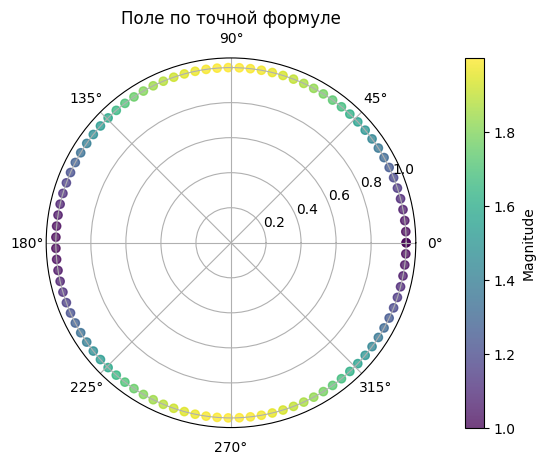

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

R = [1]*len(phi)

fig = plt.figure()
norm = Normalize(vmin=magnitude0.min(), vmax=magnitude0.max())

ax = fig.add_subplot(projection='polar')
c = ax.scatter(phi, R, c=magnitude0, cmap='viridis', norm=norm, alpha=0.75)

cbar = plt.colorbar(c, pad=0.1)
cbar.set_label('Амплитуда')
ax.set_title('Поле по точной формуле')
plt.show()


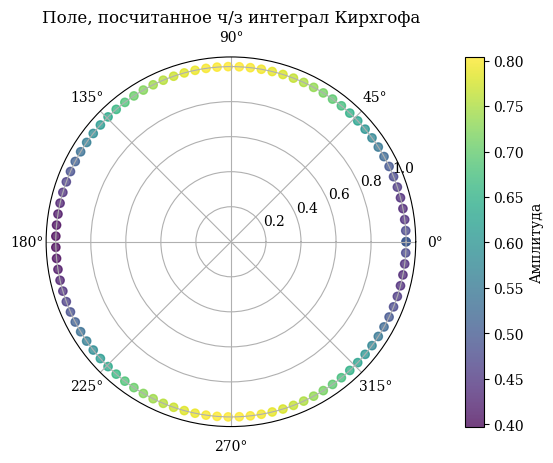

In [282]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

R = [1]*len(phi)

fig = plt.figure()
norm = Normalize(vmin=magnitude.min(), vmax=magnitude.max())

ax = fig.add_subplot(projection='polar')
c = ax.scatter(phi, R, c=magnitude, cmap='viridis', norm=norm, alpha=0.75)

cbar = plt.colorbar(c, pad=0.1)
cbar.set_label('Амплитуда')
ax.set_title('Поле, посчитанное ч/з интеграл Кирхгофа')

plt.show()


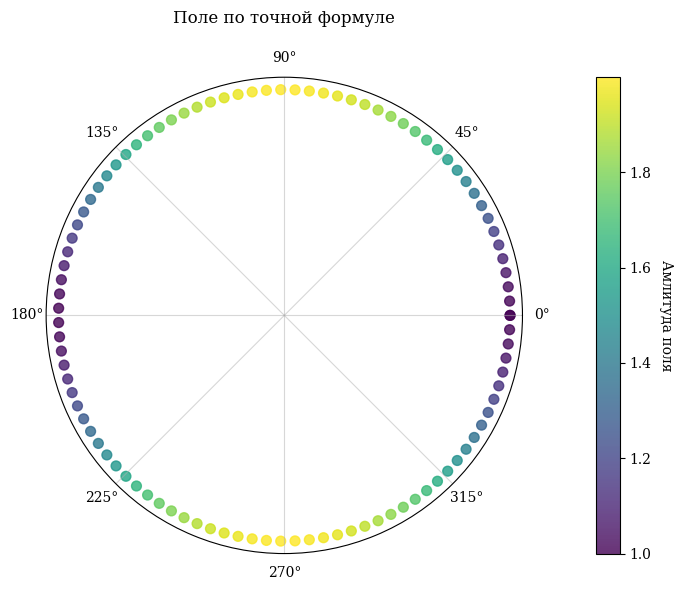

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Sample data (replace with your actual values)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='polar')

# Main plot
norm = Normalize(vmin=magnitude0.min(), vmax=magnitude0.max())
sc = ax.scatter(
    phi, 
    [1]*len(phi),  # Constant radius
    c=magnitude0,
    cmap='viridis',
    norm=norm,
    alpha=0.8,
    s=50
)

# Colorbar
cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label('Амлитуда поля', rotation=270, labelpad=15)

# Axis labels and ticks
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
ax.set_xticklabels(['0°', '45°', '90°', '135°', '180°', '225°', '270°', '315°'])
ax.set_rticks([])  # Hide radial ticks since radius is constant
ax.grid(True, alpha=0.5)

# Title and layout
ax.set_title('Поле по точной формуле', pad=20)
plt.tight_layout()
plt.show()

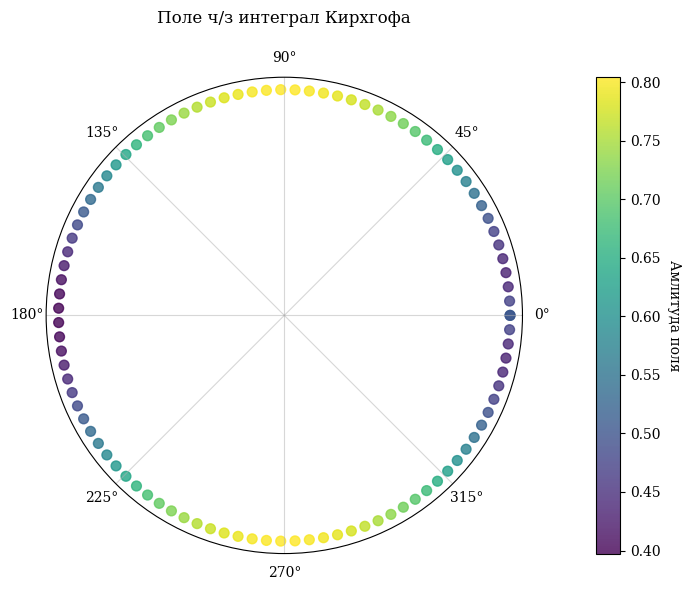

<Figure size 640x480 with 0 Axes>

In [288]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Sample data (replace with your actual values)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='polar')

# Main plot
norm = Normalize(vmin=magnitude.min(), vmax=magnitude.max())
sc = ax.scatter(
    phi, 
    [1]*len(phi),  # Constant radius
    c=magnitude,
    cmap='viridis',
    norm=norm,
    alpha=0.8,
    s=50
)

# Colorbar
cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label('Амлитуда поля', rotation=270, labelpad=15)

# Axis labels and ticks
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
ax.set_xticklabels(['0°', '45°', '90°', '135°', '180°', '225°', '270°', '315°'])
ax.set_rticks([])  # Hide radial ticks since radius is constant
ax.grid(True, alpha=0.5)

# Title and layout
ax.set_title('Поле ч/з интеграл Кирхгофа', pad=20)
plt.tight_layout()
plt.show()

plt.savefig('integral.png')